# How Can a Wellness Technology Company Play It Smart at BellaBeat?
## Lewis Rincon Castano
## Data analysis project from the Google Data Analytics certificate

### Machine Learning Models and Other Trends

Note: Exploratory data analysis was documented on the "Python_EDA_BellaBeat_Project" file.

### Business Problem: 
Which topics/variables must the company target in its next marketing campaigns?

### Conclusions:
* From the dailyActivity_merged set and its decision random tree model, we can conclude that our customers' calories activies are mostly related to how they "fairly active minutes." Then, this is followed by "light active distance" and "tracking distance." Therefore, we need to focus our next marketing campaigns related to these topics in order to demonstrate our device efficacy and usefulness regarding physical activites.

In [1]:
# Import libraries
import pandas as pd # for data exploration and cleaning
import os # change and find working directory
import csv # open csv files
import seaborn as sns # for data visualization
import matplotlib.pyplot as plt # for data visualization
import numpy as np # for data exploration and cleaning
from sklearn.impute import KNNImputer # import the KNNimputer class
import random # import random seed to keep our machine learning input values constant

import pandas as pd# Data Processing

# Feature Selection related packages
# Import the necessary libraries first
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#  Recursive Feature Elimination related packages
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Ridge regression related package
from sklearn.linear_model import Ridge

# Z-score Normalization
from sklearn.preprocessing import StandardScaler

# Modelling with Random Forest
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree # print plot tree

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

##########################################

# Get the current working directory
new_directory = '/Users/lewis/Desktop/Fitabase Data 4.12.16-5.12.16'

# Change the working directory
os.chdir(new_directory)

current_directory = os.getcwd()
print("Current working directory:", current_directory)


Current working directory: C:\Users\lewis\Desktop\Fitabase Data 4.12.16-5.12.16


In [2]:
# Open the CSV files
dailyActivity_merged = pd.read_csv('dailyActivity_merged_v2.csv')


In [3]:
# Update data types for datatime and categorical variables
# dailyActivity_merged tbl
dailyActivity_merged['date'] = pd.to_datetime(dailyActivity_merged['date'], format='%Y/%m/%d') # change datatype object to datetime


In [4]:
# Print columns data types
print("DailyActivity_merged Table")
dailyActivity_merged.info()



DailyActivity_merged Table
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   TrackerDistance           940 non-null    float64       
 2   LoggedActivitiesDistance  940 non-null    float64       
 3   VeryActiveDistance        940 non-null    float64       
 4   ModeratelyActiveDistance  940 non-null    float64       
 5   LightActiveDistance       940 non-null    float64       
 6   SedentaryActiveDistance   940 non-null    float64       
 7   VeryActiveMinutes         940 non-null    int64         
 8   FairlyActiveMinutes       940 non-null    int64         
 9   LightlyActiveMinutes      940 non-null    int64         
 10  SedentaryMinutes          940 non-null    int64         
 11  Calories                  940 non-null    int64         


## Feature Selection Model

In [5]:
# Drop the "calories" column
df = dailyActivity_merged
df = df.drop("date", axis=1)


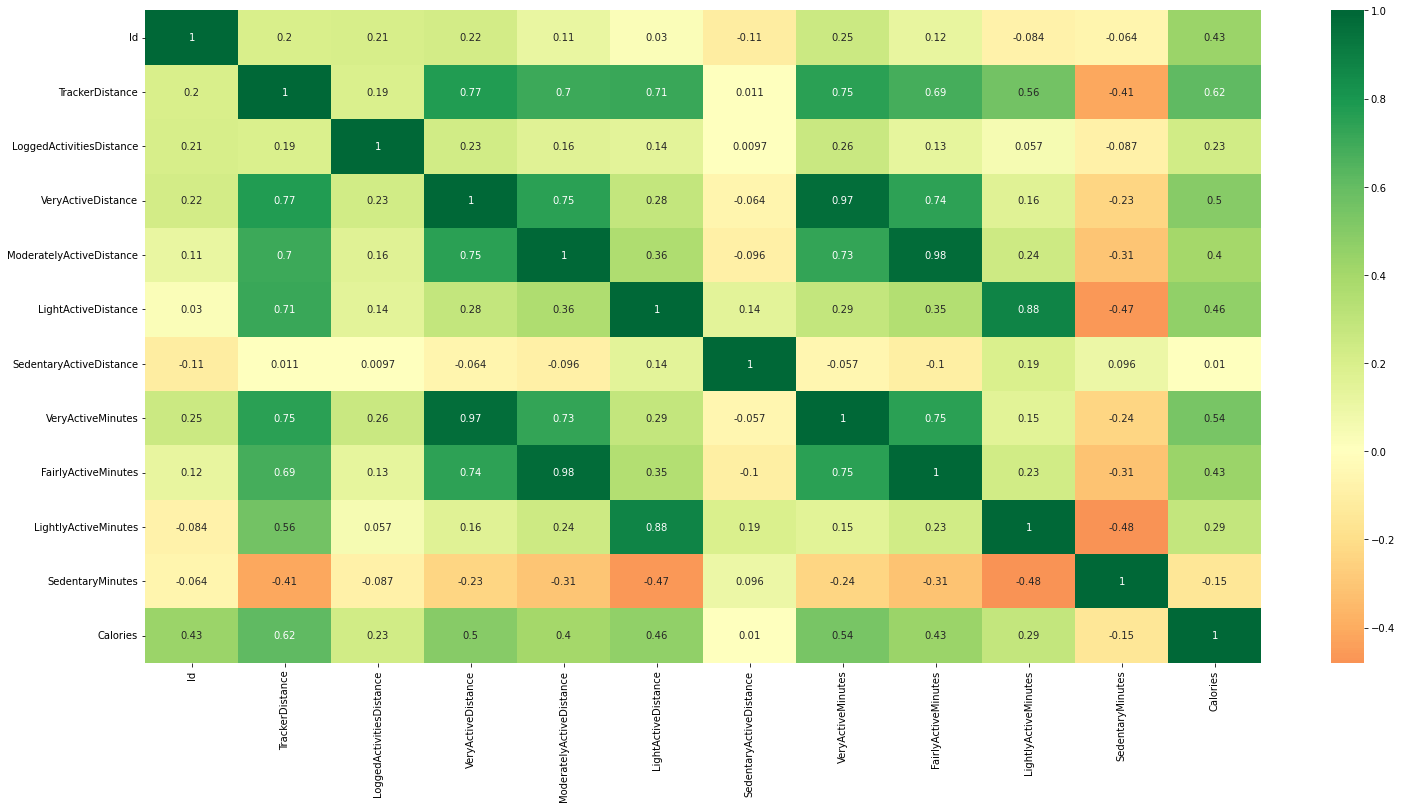

In [6]:
plt.figure(figsize=(25,12))
p = sns.heatmap(data=df.corr(method='spearman'), annot=True, cmap='RdYlGn', center=0)

From above table, our dependent variable ("Calories") is slightly postively correlated to the "VeryActiveMinutes" and "TrackerDistance" variables.

In [7]:
# Simple Linear Regression using OLS
# Preprocessing data

X = df.iloc[:,:-1].values          # Selecting all columns except last one that is 'calories'.
Y = df['Calories'].values

In [8]:
# Feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, Y)

# Summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)

features = fit.transform(X)
# Summarize selected features
print(features[0:5,:])


[1.018e+12 2.430e+03 2.931e+03 4.098e+03 1.120e+03 1.043e+03 2.339e+01
 4.489e+04 2.436e+04 4.983e+04 7.427e+04]
[[1.504e+09 2.500e+01 3.280e+02 7.280e+02]
 [1.504e+09 2.100e+01 2.170e+02 7.760e+02]
 [1.504e+09 3.000e+01 1.810e+02 1.218e+03]
 [1.504e+09 2.900e+01 2.090e+02 7.260e+02]
 [1.504e+09 3.600e+01 2.210e+02 7.730e+02]]


You can see the scores for each attribute and the 11 attributes chosen (those with the highest scores). This scores will help you further in determining the best features for training your model.

In [9]:
# Feature extraction
model = LogisticRegression()
rfe = RFE(estimator=model, n_features_to_select=10)
fit = rfe.fit(X, Y)

print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))


Num Features: 10
Selected Features: [ True  True  True  True  True  True False  True  True  True  True]
Feature Ranking: [1 1 1 1 1 1 2 1 1 1 1]


In [10]:
# Next, you will use Ridge regression to determine the coefficient R2.
ridge = Ridge(alpha=1.0)
ridge.fit(X,Y)


C:\Users\lewis\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.89046e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge()

In [11]:
# Next, you will pass Ridge model's coefficient terms to this little function and see what happens.
ridge_model = Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
                    random_state=None, solver='auto', tol=0.001)


In [12]:
# A helper method for pretty-printing the coefficients
def pretty_print_coefs(coefs, names = None, sort = False):
    if names == None:
        names = ["X%s" % x for x in range(len(coefs))]
    lst = zip(coefs, names)
    if sort:
        lst = sorted(lst,  key = lambda x:-np.abs(x[0]))
    return " + ".join("%s * %s" % (round(coef, 3), name)
                                   for coef, name in lst)


In [13]:
print ("Ridge model:", pretty_print_coefs(ridge.coef_))


Ridge model: 0.0 * X0 + 169.656 * X1 + 33.556 * X2 + -198.611 * X3 + -465.627 * X4 + 64.262 * X5 + 85.05 * X6 + 11.633 * X7 + 15.129 * X8 + -1.393 * X9 + 0.403 * X10


In [14]:
column_names = df.columns.tolist()

print(column_names)

['Id', 'TrackerDistance', 'LoggedActivitiesDistance', 'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance', 'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories']


In [15]:
# For the following machine learning models, we will discarding the variables that are not positively influencing
# our dependent variables.
df = df.drop('Id', axis=1)
df = df.drop('SedentaryActiveDistance', axis=1)
df = df.drop('LightlyActiveMinutes', axis=1)
df = df.drop('SedentaryMinutes', axis=1)


In [16]:
print(df.columns)

Index(['TrackerDistance', 'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance', 'VeryActiveMinutes',
       'FairlyActiveMinutes', 'Calories'],
      dtype='object')


## Random Forest Model

In [17]:

# Select the columns to be normalized
columns_to_normalize = ['TrackerDistance', 'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance', 'VeryActiveMinutes',
       'FairlyActiveMinutes', 'Calories']

# Initialize the scaler
scaler = StandardScaler()

# Apply Z-score normalization to the selected columns
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])


In [18]:
# Split the data into features (X) and target (y)
# Drop the "calories" column
X = df.drop('Calories', axis=1)
y = df['Calories']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [19]:
X # proof of the prior scaling method

,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,VeryActiveMinutes,FairlyActiveMinutes
0,0.774519,-0.174591,0.141981,-0.019864,1.333213,0.116827,-0.028278
1,0.382733,-0.174591,0.025332,0.138666,0.671309,-0.005023,0.272071
2,0.323837,-0.174591,0.352704,-0.189719,0.279069,0.269139,-0.128394
3,0.206046,-0.174591,0.239817,0.784112,-0.250454,0.238676,1.022943
4,0.687455,-0.174591,0.454302,-0.178395,0.833108,0.451913,-0.178452
...,...,...,...,...,...,...,...
935,0.674652,-0.174591,-0.159050,-0.416191,1.696035,-0.126873,-0.478801
936,3.271192,-0.174591,3.611373,0.263226,1.421467,1.579023,0.272071
937,0.684895,-0.174591,-0.057452,-0.121777,1.441079,-0.096410,-0.128394
938,3.606642,-0.174591,4.409107,-0.178395,1.249862,2.035959,-0.078336


In [20]:
# Create decision tree regression model
reg_decision_model=DecisionTreeRegressor()


In [21]:
# fit independent varaibles to the dependent variables
reg_decision_model.fit(X_train,y_train)

DecisionTreeRegressor()

In [22]:
# Score of 0.93
reg_decision_model.score(X_train,y_train)


0.9484640387177322

In [23]:
# Score of 0.24, we will tune our hyperparameter since our data set is overfitting
reg_decision_model.score(X_test,y_test)


0.311542669789837

In [24]:
prediction=reg_decision_model.predict(X_test)


C:\Users\lewis\AppData\Local\Temp/ipykernel_14016/933722746.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction)


<Axes: xlabel='Calories', ylabel='Density'>

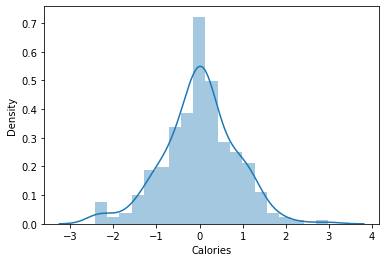

In [25]:
# checking difference between labled y and predicted y
# Good bell curve only tell us the range of predicted values are 
# with in the same range as our original data range values are.
sns.distplot(y_test-prediction)

In [26]:
# Hyper parameters range intialization for tuning 
# Below we intialized hyperparmeters random range using Gridsearch to 
# find the best parameters for our decision tree model.
parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40] }

In [27]:
# calculating different regression metrics
tuning_model=GridSearchCV(reg_decision_model,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=3)


In [28]:
# function for calculating how much time take for hyperparameter tuning

def timer(start_time=None):
    if not start_time:
        start_time=datetime.now()
        return start_time
    elif start_time:
        thour,temp_sec=divmod((datetime.now()-start_time).total_seconds(),3600)
        tmin,tsec=divmod(temp_sec,60)
        #print(thour,":",tmin,':',round(tsec,2))

In [29]:
%%capture
from datetime import datetime

start_time=timer(None)

tuning_model.fit(X,y)

timer(start_time)
# it took 15 minutes to review our different paramters; it may take less depending of your laptop computing power

In [30]:
# best hyperparameters 
tuning_model.best_params_

{'max_depth': 12,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'min_samples_leaf': 2,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [31]:
# best hyperparameters 
tuning_model.best_params_

{'max_depth': 12,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'min_samples_leaf': 2,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [32]:
# Update hyperparameters
tuned_hyper_model= DecisionTreeRegressor(max_depth=5,max_features= 'sqrt',max_leaf_nodes= None,
                                         min_samples_leaf=6,min_weight_fraction_leaf=0.1,splitter= 'best')


In [33]:
# fitting model


tuned_hyper_model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5, max_features='sqrt', min_samples_leaf=6,
                      min_weight_fraction_leaf=0.1)

In [34]:
# prediction 

tuned_pred=tuned_hyper_model.predict(X_test)

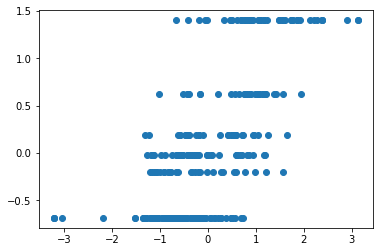

In [35]:
plt.scatter(y_test,tuned_pred)


In [36]:
# With hyperparameter tuned 

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,tuned_pred))
print('MSE:', metrics.mean_squared_error(y_test, tuned_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, tuned_pred)))

MAE: 0.595304771364709
MSE: 0.5706970230043887
RMSE: 0.7554449172536597


In [37]:
# without hyperparameter tuning 

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 0.6346675733269095
MSE: 0.7158744272719473
RMSE: 0.8460936279584826


From the above two last code chunks, we can conclude that the better tuned parameters have better evaluation metrics since their mean error are lower

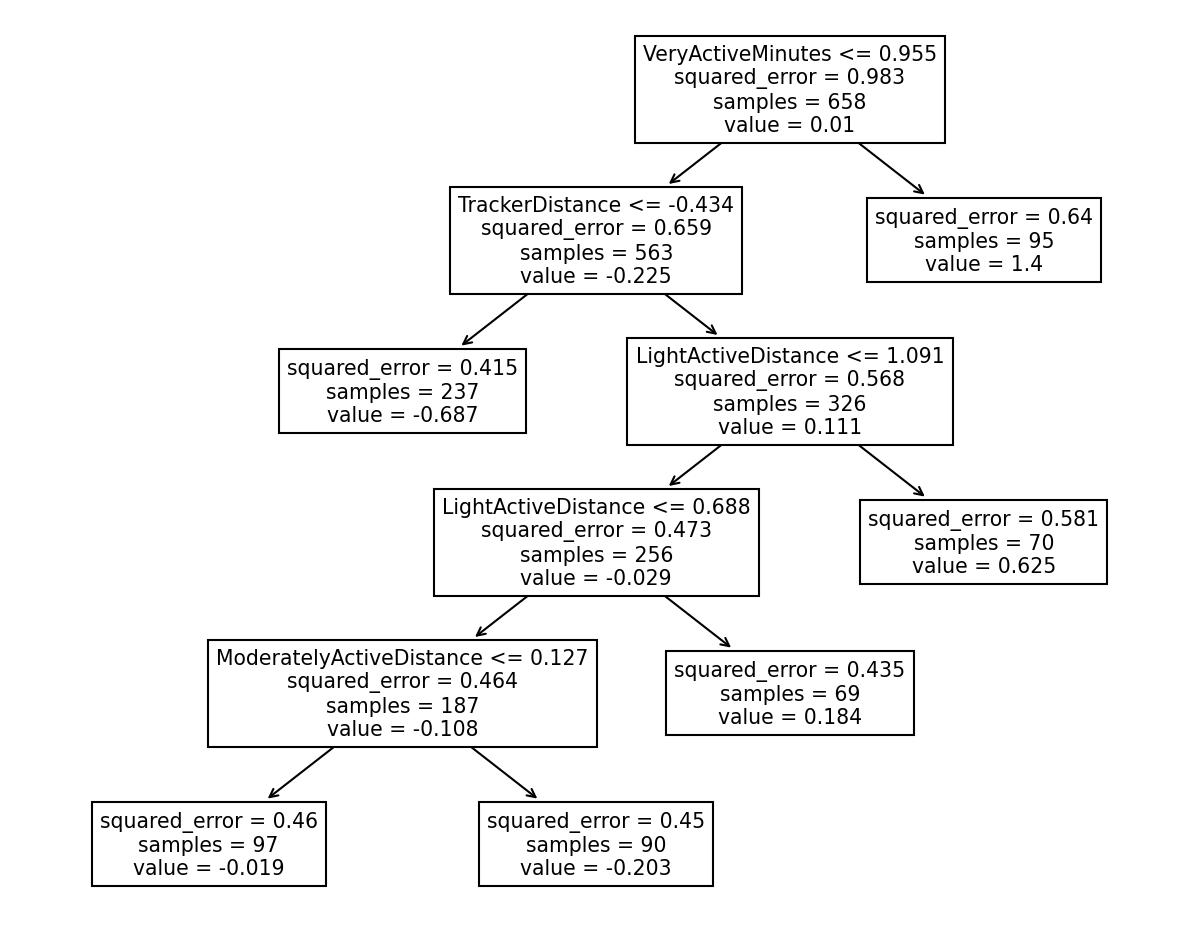

In [38]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,8), dpi=150)
plot_tree(tuned_hyper_model, feature_names=X.columns);

### Limitations:
* The inclusion of the "time" and "AM/PM" variable might increased our understanding and accuracy for the distinct "y" variables across our table.
* For further analysis, the use of other machine learning models such as XGBoost, Vector Machines, and more, they could produce other insights and accuracies.
* We have inconsitent "Id" values accross of our different tables. Therefore, I did not add them to this model since we will losing more than 50% of our main set, dailyActivity_merged.


## Conclusions:
From above tree plot, we can conclude that our customers' calories activies are mostly related to how they "fairly active minutes." Then, this is followed by "light active distance" and "tracking distance." Therefore, we need to focus our next marketing campaigns related to these topics in order to demonstrate our device efficacy and usefulness regarding physical activites.

## Sources

* Feature selection code: https://www.datacamp.com/tutorial/feature-selection-python
* Decision Tree Regression code: https://www.nbshare.io/notebook/312837011/Decision-Tree-Regression-With-Hyper-Parameter-Tuning-In-Python/
    * Regression plot tree: https://data36.com/regression-tree-python-scikit-learn/
